In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD



/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022


In [3]:
# 0. MNiST 데이터 읽기=============
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [5]:
# 1. 실험용 설정============
# weight 초기값 종류별 지정
weight_init_types = {'std=0.01':0.01, 'Xavier':'sigmoid', 'He':'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    # 초기값 별로 신경망 생성
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100], 
        output_size=10, weight_init_std=weight_type
    )
    train_loss[key] = []

In [7]:
# 2. 훈련 시작==============
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 구하고 가중치 업데이트
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i%100 == 0:
        print("============" + "iteration" + str(i) + "=============")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

============iteration0=============
std=0.01:2.302499518159448
Xavier:2.3238314259525774
He:2.359008734853785
============iteration100=============
std=0.01:2.3022425583350987
Xavier:2.2713609871210227
He:1.5331701778116054
============iteration200=============
std=0.01:2.3025494688044046
Xavier:2.1739417706458006
He:0.684829580903908
============iteration300=============
std=0.01:2.302935064382961
Xavier:2.0131052447975923
He:0.5584755358237109
============iteration400=============
std=0.01:2.3041225146477435
Xavier:1.5731688584174508
He:0.4427956661690762
============iteration500=============
std=0.01:2.30257693916674
Xavier:0.9802783902787394
He:0.3450418112515455
============iteration600=============
std=0.01:2.299756249852324
Xavier:0.8086580853078704
He:0.36128877619633165
============iteration700=============
std=0.01:2.300079184463265
Xavier:0.6695889360536111
He:0.3791630920344845
============iteration800=============
std=0.01:2.3036956853335235
Xavier:0.6294878700845306
He:0.

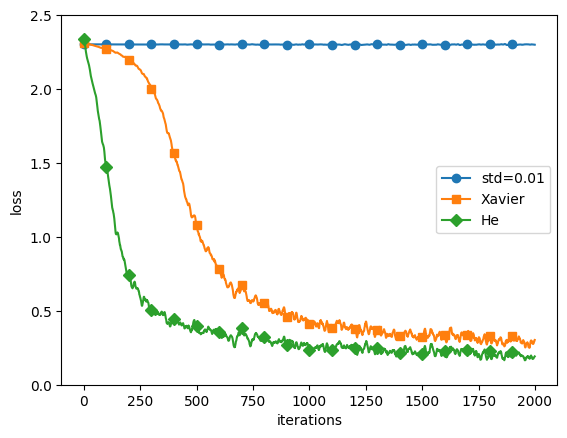

In [8]:
# 3. 그래프 그리기==========
markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()